# 6-A

In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("/content/a5_q6.csv")

In [5]:
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93


In [6]:
warm_data=[i for i in data.loc[data["Temprature"]>12][["Confirmed"]]["Confirmed"]]

In [7]:
cold_data=[i for i in data.loc[data["Temprature"]<=12][["Confirmed"]]["Confirmed"]]

In [8]:
len(warm_data)+len(cold_data)==len(data)

True

In [9]:
len(data)

206

Now We have to check whether these two distributions are same or not. Using Z-test, we can check whether the means of these two distributions are same or not.

Null Hypothesis Ho : The two smaples follow similar distribution. uo = u1.
Alternate Hypothesis H1 : The two samples follow differean distributions. uo != u1.

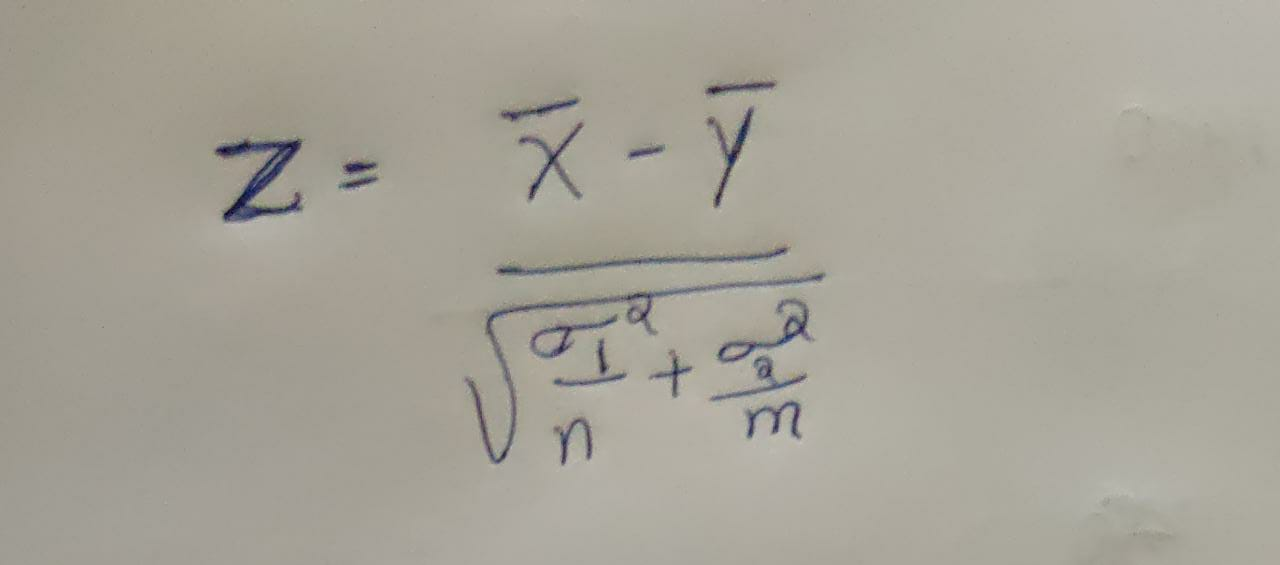

In [10]:
mean_warm,var_warm = np.mean(warm_data),np.var(warm_data)
mean_cold,var_cold = np.mean(cold_data),np.var(cold_data)
n,m=len(warm_data),len(cold_data)

In [11]:
Z = (mean_warm - mean_cold)/(((var_warm/n)+(var_cold/m))**0.5)
Z

0.9008184682299488

Z follows normal distribution.

In [12]:
import scipy.stats as st
alpha = 0.05
if abs(Z)>st.norm.ppf(1-(alpha/2)):
  null_hypothesis = False
else:
  null_hypothesis = True
null_hypothesis

True

p_value = 2(1-phi(Z))
From Z lookup table, p_value = **0.36**

So, the null hypothesis is Accepted. 
Temperature does not effect the covid - 19 outbreak.

# 6-B

In [13]:
humid_data=[i for i in data.loc[data["Humidity"]>=65][["Confirmed"]]["Confirmed"]]
non_humid_data = cold_data=[i for i in data.loc[data["Humidity"]<65][["Confirmed"]]["Confirmed"]]

In [14]:
len(humid_data)+len(non_humid_data)==len(data)

True

Now We have to check whether these two distributions are same or not. Using Z-test, we can check whether the means of these two distributions are same or not.

Null Hypothesis Ho : The two smaples follow similar distribution. uo = u1.
Alternate Hypothesis H1 : The two samples follow differean distributions. uo != u1.
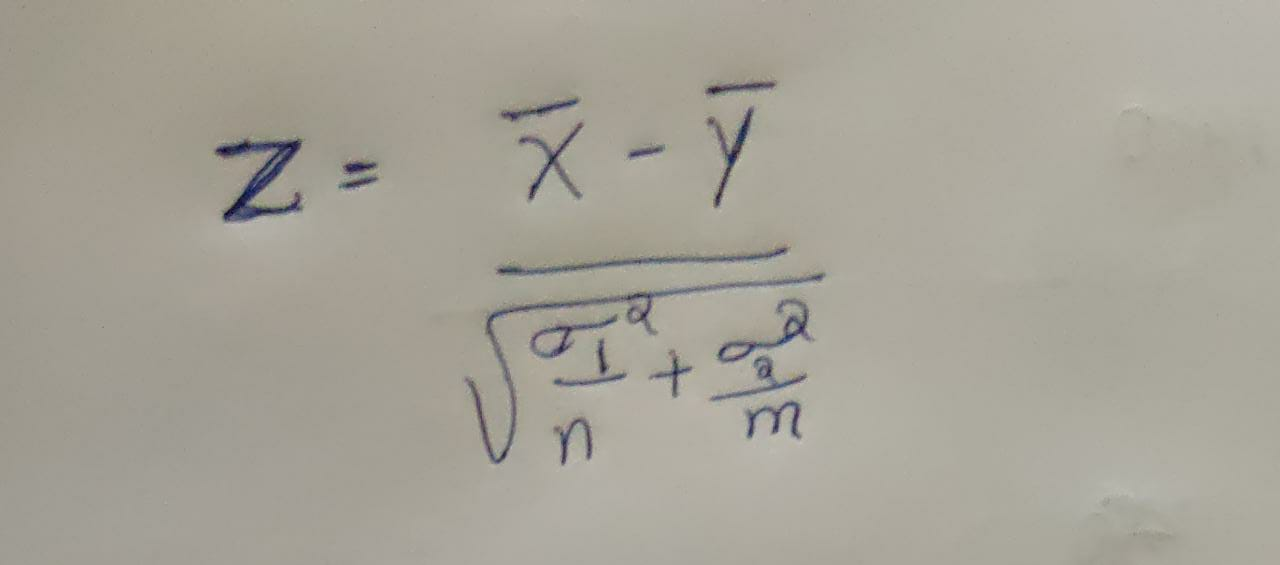

In [15]:
mean_humid,var_humid = np.mean(humid_data),np.var(humid_data)
mean_non_humid,var_non_humid = np.mean(non_humid_data),np.var(non_humid_data)
n,m=len(humid_data),len(non_humid_data)

In [16]:
Z = (mean_humid - mean_non_humid)/(((var_humid/n)+(var_non_humid/m))**0.5)
Z

0.26384394390208055

In [17]:
alpha = 0.05
if abs(Z)>st.norm.ppf(1-(alpha/2)):
  null_hypothesis = False
else:
  null_hypothesis = True
null_hypothesis

True

p_value = 2(1-phi(Z))
From Z lookup table, p_value = **0.8**

So, the null hypothesis is Accepted. 
Humidity does not effect the covid - 19 outbreak.

# 6-C

Null Hypothesis Ho : The two smaples follow similar distribution. uo = u1.
Alternate Hypothesis H1 : The two samples follow differean distributions. uo != u1.

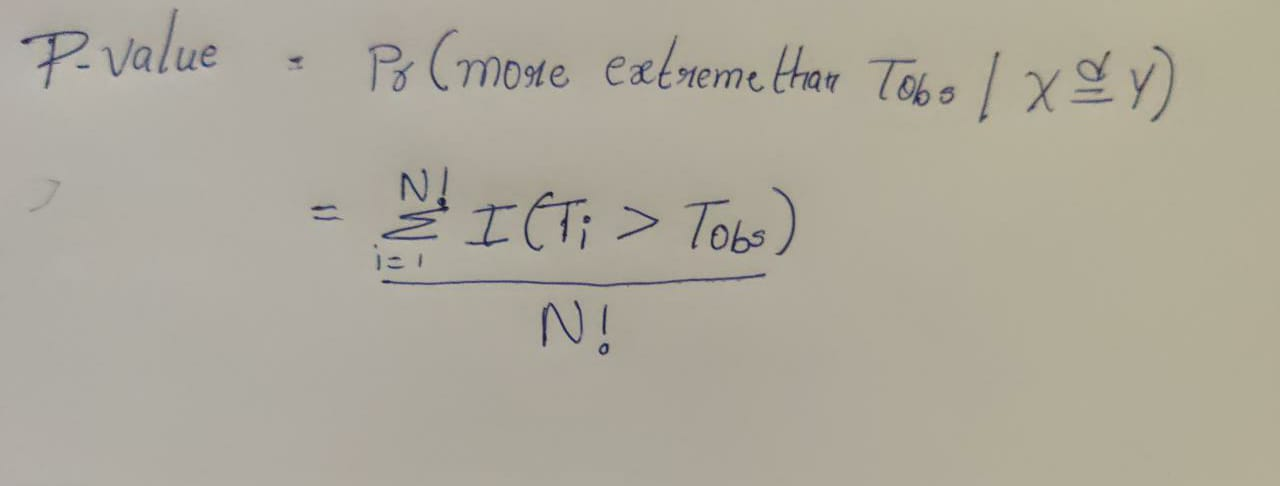

In [18]:
from itertools import permutations
import random

In [19]:
data=pd.read_csv("/content/a5_q6.csv")

In [20]:
warm_data=[i for i in data.loc[data["Temprature"]>12][["Confirmed"]]["Confirmed"]]
cold_data=[i for i in data.loc[data["Temprature"]<=12][["Confirmed"]]["Confirmed"]]

In [21]:
data=[i for i in data["Confirmed"]]

In [22]:
len(warm_data)+len(cold_data)==len(data)

True

In [23]:
a,b=len(warm_data),len(cold_data)

In [24]:
def generate_data(l,a,b,T_obs):
  def find_xmean(row):
    return sum(row["X"])/len(row["X"])
  def find_ymean(row):
    return sum(row["Y"])/len(row["Y"])
  def finddiff(row):
    return round(abs(row["X_mean"]-row["Y_mean"]),2)
  def solve(row):
    return 1 if row["T = |X_mean - Y_mean |"] > T_obs else 0
  n=len(l)
  X,Y=[],[]
  for i in range(n):
    X.append(l[i][:a])
    Y.append(l[i][a:])
  data=pd.DataFrame()
  
  data["X"],data["Y"]=X,Y
  data["X_mean"] = data.apply(find_xmean, axis = 1)
  data["Y_mean"] = data.apply(find_ymean, axis = 1)
  data["T = |X_mean - Y_mean |"] = data.apply(finddiff,axis = 1)
  data["I (T > T_obs)"] = data.apply(solve,axis = 1)
  return data

In [25]:
def perm_generator(seq):
    seen = set()
    length = len(seq)
    while True:
        perm = tuple(random.sample(seq, length))
        if perm not in seen:
            seen.add(perm)
            yield perm

In [26]:
def p_value(data):
  return data.iloc[:,-1].sum()/len(data)

In [27]:
def get_p_value(n):
  rand_perms = perm_generator(data)
  permlist= [next(rand_perms) for _ in range(n)]
  permlist=list(map(list,permlist))
  T_obs = abs(np.mean(warm_data)-np.mean(cold_data))
  data1=generate_data(permlist,a,b,T_obs)
  return p_value(data1)

For n = 500

In [28]:
p=get_p_value(500)
null_hypothesis = False if p<0.05 else True
null_hypothesis

True

So,the Null Hypothesis is accepted according to the permutation test.
Temperature does not effect the covid - 19 outbreak.

For n = 1000

In [29]:
p=get_p_value(1000)
null_hypothesis = False if p<0.05 else True
null_hypothesis

True

So,the Null Hypothesis is accepted according to the permutation test.
Temperature does not effect the covid - 19 outbreak.

# 6-D

Null Hypothesis Ho : The two smaples follow similar distribution. uo = u1.
Alternate Hypothesis H1 : The two samples follow differean distributions. uo != u1.

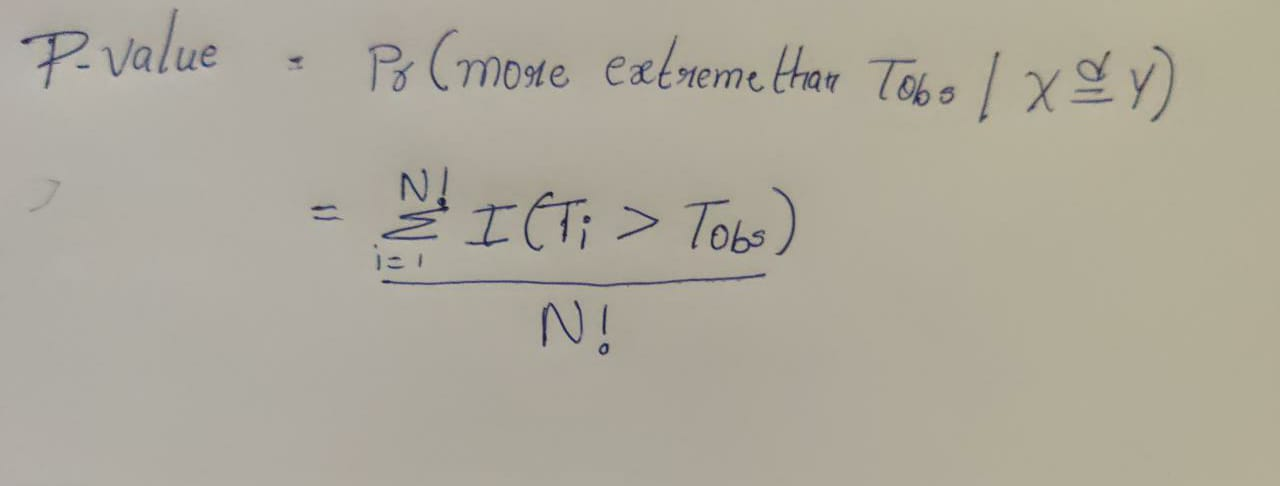

In [30]:
data=pd.read_csv("/content/a5_q6.csv")

In [31]:
humid_data=[i for i in data.loc[data["Humidity"]>=65][["Confirmed"]]["Confirmed"]]
non_humid_data = cold_data=[i for i in data.loc[data["Humidity"]<65][["Confirmed"]]["Confirmed"]]

In [32]:
data=[i for i in data["Confirmed"]]

In [33]:
a,b=len(humid_data),len(non_humid_data)

In [34]:
def get_p_value(n):
  rand_perms = perm_generator(data)
  permlist= [next(rand_perms) for _ in range(n)]
  permlist=list(map(list,permlist))
  T_obs = abs(np.mean(humid_data)-np.mean(non_humid_data))
  data1=generate_data(permlist,a,b,T_obs)
  return p_value(data1)

For n = 500

In [35]:
p=get_p_value(500)
print("p_value =",p)
null_hypothesis = False if p<0.05 else True
null_hypothesis

p_value = 0.992


True

So,the Null Hypothesis is accepted according to the permutation test.
Humidity does not effect the covid - 19 outbreak.

For n = 1000

In [36]:
p=get_p_value(1000)
null_hypothesis = False if p<0.05 else True
null_hypothesis

True

So,the Null Hypothesis is accepted according to the permutation test.
Humidity does not effect the covid - 19 outbreak.